In [1]:
# Bibliotecas a serem utilizadas
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib notebook

In [2]:
# Arquivos a serem utilizados
pop = pd.read_csv("pop_residente.csv", sep=";")
nivel = pd.read_csv("nivel_instrucao.csv", sep=";")
ocupacao = pd.read_csv("ocupacao.csv", sep=";")
renda = pd.read_csv("renda.csv", sep=";")
agua = pd.read_csv("agua.csv", sep=";")

# Gráfico 1

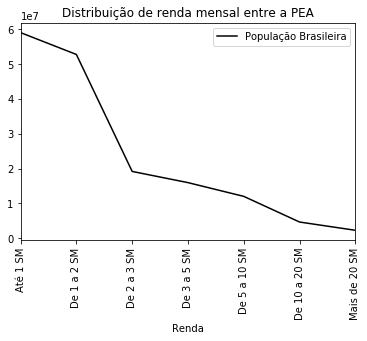

In [3]:
renda["Renda"] = "N/A"
renda["População Brasileira"] = "N/A"
# As colunas acima foram criadas porque elas formam os eixos do gráfico abaixo
#renda["Até 1 SM"].sum() é igual a 59031740, por isso utilizamos este valor
renda.loc[7000] = ["Até 1 SM","Até 1 SM",59031740,59031740,59031740,59031740,59031740,59031740,59031740,59031740,59031740,59031740,"Até 1 SM",59031740]
#renda["De 1 a 2 SM"].sum() é igual a 52762072, por isso utilizamos este valor
renda.loc[7001] = ["De 1 a 2 SM","De 1 a 2 SM",52762072,52762072,52762072,52762072,52762072,52762072,52762072,52762072,52762072,52762072,"De 1 a 2 SM",52762072]
#renda["De 2 a 3 SM"].sum() é igual a 19180831, por isso utilizamos este valor
renda.loc[7002] = ["De 2 a 3 SM","De 2 a 3 SM",19180831,19180831,19180831,19180831,19180831,19180831,19180831,19180831,19180831,19180831,"De 2 a 3 SM",19180831]
#renda["De 3 a 5 SM"].sum() é igual a 15969147, por isso utilizamos este valor
renda.loc[7003] = ["De 3 a 5 SM","De 3 a 5 SM",15969147,15969147,15969147,15969147,15969147,15969147,15969147,15969147,15969147,15969147,"De 3 a 5 SM",15969147]
#renda["De 5 a 10 SM"].sum() é igual a 12020861, por isso utilizamos este valor
renda.loc[7004] = ["De 5 a 10 SM","De 5 a 10 SM",12020861,12020861,12020861,12020861,12020861,12020861,12020861,12020861,12020861,12020861,"De 5 a 10 SM",12020861]
#renda["De 10 a 20 SM"].sum() é igual a 4655238, por isso utilizamos este valor
renda.loc[7005] = ["De 10 a 20 SM","De 10 a 20 SM",4655238,4655238,4655238,4655238,4655238,4655238,4655238,4655238,4655238,4655238,"De 10 a 20 SM",4655238]
#renda["Mais de 20 SM"].sum() é igual a 2284812, por isso utilizamos este valor
renda.loc[7006] = ["Mais de 20 SM","Mais de 20 SM",2284812,2284812,2284812,2284812,2284812,2284812,2284812,2284812,2284812,2284812,"Mais de 20 SM",2284812]
linhas = [7000,7001,7002,7003,7004,7005,7006]
renda2 = renda.loc[linhas]
renda2.plot(x="Renda",y="População Brasileira",kind="line",rot=90,title="Distribuição de renda mensal entre a PEA",color="black")
renda.drop(linhas,axis=0,inplace=True)
# Demos drop nas linhas para não interferir em usos futuros do mesmo arquivo

O gráfico de linha acima evidencia como a renda é distribúida pela População Economicamente Ativa(PEA) do Brasil

# Gráfico 2

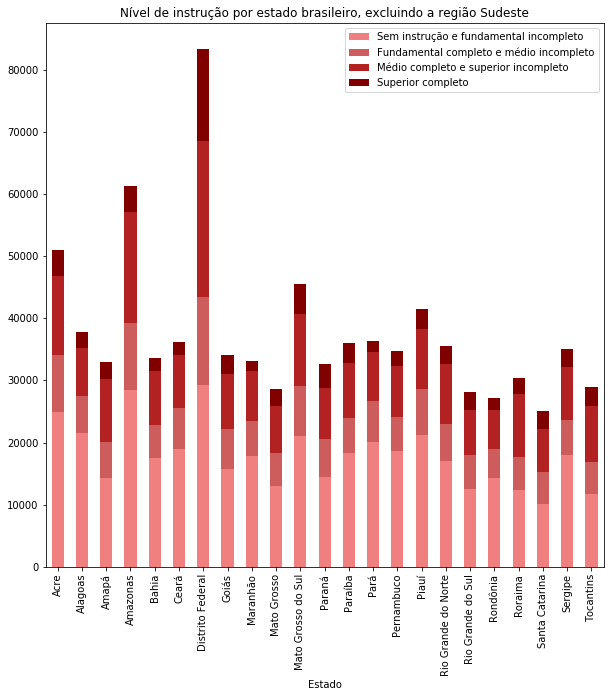

In [4]:
condicao = (nivel["Estado"] != "São Paulo") & (nivel["Estado"] != "Rio de Janeiro") & (nivel["Estado"] != "Minas Gerais") & (nivel["Estado"] != "Espírito Santo")
nivel_agrupado = nivel[condicao].groupby("Estado").agg("mean")
nivel_agrupado.plot(y=["Sem instrução e fundamental incompleto", "Fundamental completo e médio incompleto", "Médio completo e superior incompleto", "Superior completo"], kind="bar", stacked=True, title="Nível de instrução por estado brasileiro, excluindo a região Sudeste", figsize=(10,10), color = ["lightcoral", "indianred", "firebrick", "maroon"])

O gráfico de barras empilhadas acima mostra o nível de instrução por estado, descartando a região Sudeste

# Gráfico 3

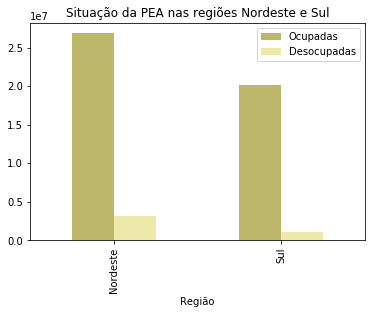

In [5]:
condicao = (ocupacao["Estado"] == "Rio Grande do Sul") | (ocupacao["Estado"] == "Santa Catarina") | (ocupacao["Estado"] == "Paraná")
condicao1 = (ocupacao["Estado"] == "São Paulo") | (ocupacao["Estado"] == "Rio de Janeiro") | (ocupacao["Estado"] == "Espirito Santo") | (ocupacao["Estado"] == "Minas Gerais")
condicao2 = (ocupacao["Estado"] == "Mato Grosso") | (ocupacao["Estado"] == "Mato Grosso do Sul") | (ocupacao["Estado"] == "Goiás") | (ocupacao["Estado"] == "Distrito Federal")
condicao3 = (ocupacao["Estado"] == "Ceará") | (ocupacao["Estado"] == "Sergipe") | (ocupacao["Estado"] == "Rio Grande do Norte") | (ocupacao["Estado"] == "Paraíba") |(ocupacao["Estado"] == "Pernambuco") | (ocupacao["Estado"] == "Maranhão") | (ocupacao["Estado"] == "Piaui") | (ocupacao["Estado"] == "Bahia") | (ocupacao["Estado"] == "Alagoas")
condicao4 = (ocupacao["Estado"] == "Amazonas") | (ocupacao["Estado"] == "Pará") | (ocupacao["Estado"] == "Acre") | (ocupacao["Estado"] == "Roraima")|(ocupacao["Estado"] == "Rondônia") | (ocupacao["Estado"] == "Amapá") | (ocupacao["Estado"] == "Tocantins")
linhas = list(ocupacao[condicao].index.values)
linhas1 = list(ocupacao[condicao1].index.values)
linhas2 = list(ocupacao[condicao2].index.values)
linhas3 = list(ocupacao[condicao3].index.values)
linhas4 = list(ocupacao[condicao4].index.values)
for i in linhas:
    ocupacao.at[i, "Região"] = "Sul"
for i in linhas1:
    ocupacao.at[i, "Região"] = "Sudeste"
for i in linhas2:
    ocupacao.at[i, "Região"] = "Centro-Oeste"
for i in linhas3:
    ocupacao.at[i, "Região"] = "Nordeste"
for i in linhas4:
    ocupacao.at[i, "Região"] = "Norte"
condicao5= (ocupacao["Região"] == "Nordeste") | (ocupacao["Região"] == "Sul")
ocupacao[condicao5].groupby("Região").agg("sum").plot(y=["Ocupadas","Desocupadas"],kind="bar",title="Situação da PEA nas regiões Nordeste e Sul", color=["darkkhaki", "palegoldenrod"])

O gráfico de barras acima apresenta qual é a situação da PEA nas regiões Nordeste e Sul, estabelecendo a relação de pessoas ocupadas e desocupadas

# Gráfico 4

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A68BC18>]],
      dtype=object)

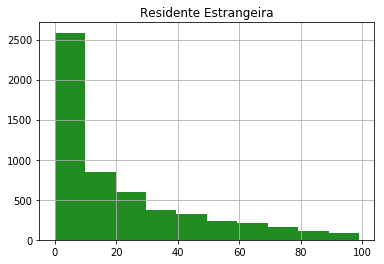

In [6]:
condicao= (pop["Residente Estrangeira"]) < 100
pop[condicao].hist("Residente Estrangeira",color="forestgreen")

O gráfico acima mostra a quantidade de municípios com determinado número de residentes estrangeiros

# Gráfico 5

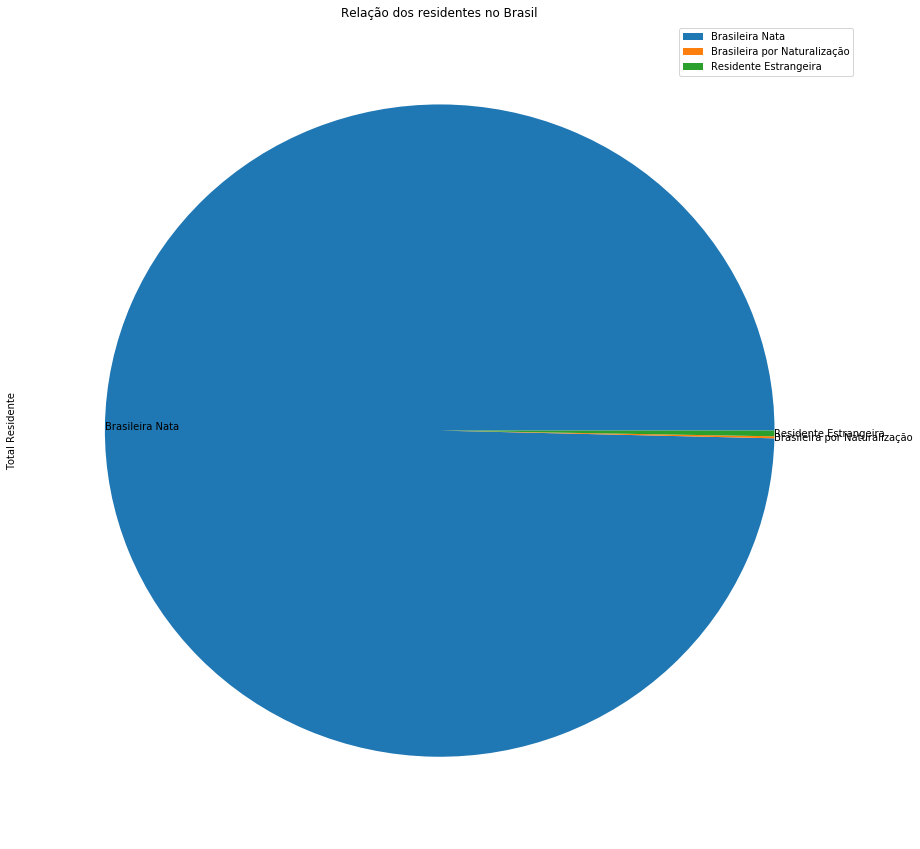

In [7]:
# pop["Brasileira Nata"].sum() é igual a 284440904, por isso utilizamos este valor
pop.loc[7000] = ["Brasileira Nata","Brasileira Nata",284440904,284440904,284440904,284440904,284440904,284440904]
# pop["Brasileira por naturalização"].sum() é igual a 282131, por isso utilizamos este valor
pop.loc[7001] = ["Brasileira por Naturalização","Brasileira por Naturalização",282131,282131,282131,282131,282131,282131]
# pop["Residente Estrangeira"].sum() é igual a 795435, por isso utilizamos este valor
pop.loc[7002] = ["Residente Estrangeira","Residente Estrangeira",795435,795435,795435,795435,795435,795435]
linhas = [7000, 7001, 7002]
pop2 = pop.loc[linhas]
pop2.set_index("Município", inplace=True)
pop2.plot(y="Total Residente",kind="pie",figsize=(15,15),title="Relação dos residentes no Brasil",center=(1.1,0), labeldistance=(1))
pop.drop(linhas, axis=0, inplace=True)
# Demos drop nas linhas para não interferir em usos futuros do mesmo arquivo

O gráfico de pizza acima evidencia a relação em porcentagem dos residentes no Brasil

# Gráfico 6

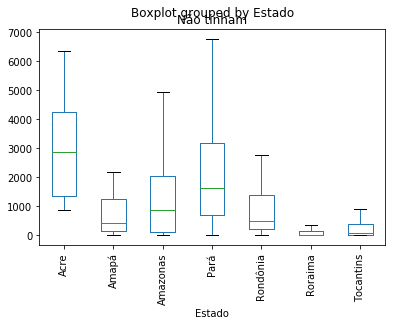

In [8]:
condicao = (agua["Estado"] == "Amazonas") | (agua["Estado"] == "Pará") | (agua["Estado"] == "Acre") | (agua["Estado"] == "Roraima")|(agua["Estado"] == "Rondônia") | (agua["Estado"] == "Amapá") | (agua["Estado"] == "Tocantins")
agua[condicao].boxplot("Não tinham", by="Estado",showfliers=False,rot=90,grid=False)

O gráfico acima é um boxplot o qual apresenta como parâmetro os domicílios que não tinham água(em 2010) agrupados por estado da região Norte

# Questão 1

### Qual o estado com menor porcentagem de domicílios sem água? E o maior?

,Total domicílios,Total com água canalizada,Água em pelo menos um cômodo,Rede geral de distribuição,Outra forma,Água no terreno ou propriedade,Rede geral de distribuição.1,Outra forma.1,Não tinham,Código da Unidade Geográfica,Porcentagem nao tinham
Estado,,,,,,,,,,,
Acre,17347.153846,13152.538462,11376.846154,7476.000000,3900.769231,1775.923077,1376.538462,399.384615,4194.692308,1.015678e+12,27.871676
Alagoas,12793.469136,12052.530864,11582.370370,9433.629630,2148.679012,470.098765,355.913580,114.209877,740.913580,2.170064e+12,8.535728
Amapá,9725.000000,8577.333333,7730.750000,5054.208333,2676.458333,846.625000,492.500000,354.041667,1147.916667,1.466982e+12,11.502558
Amazonas,18884.573770,16868.540984,15612.196721,12637.573770,2974.606557,1256.393443,888.967213,367.344262,2016.049180,1.110372e+12,14.962818
Bahia,11958.292135,11072.667416,10484.375281,9943.671910,540.703371,588.310112,488.451685,99.867416,885.642697,2.354849e+12,10.316178
Ceará,12090.493333,10858.783333,10375.526667,9412.383333,963.150000,483.276667,365.230000,118.023333,1231.683333,1.837487e+12,13.528842
Distrito Federal,29770.692308,29639.211538,28743.307692,27487.596154,1255.711538,895.942308,834.692308,61.192308,131.423077,5.198183e+12,0.498510
Espírito Santo,10557.731707,10493.250000,10319.012195,9358.969512,960.079268,174.237805,142.359756,31.865854,64.548780,2.715039e+12,0.741029
Goiás,12583.363636,12260.327273,11877.713636,10057.995455,1819.709091,382.527273,279.468182,103.086364,323.095455,4.286773e+12,2.559734


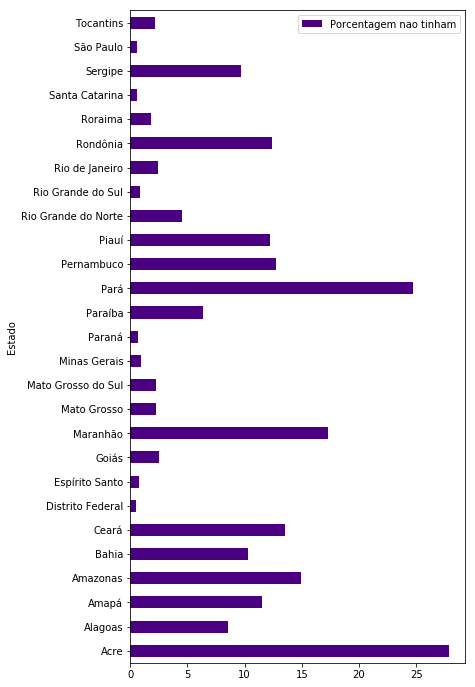

In [9]:
agua["Porcentagem nao tinham"] = (agua["Não tinham"]*100)/agua["Total domicílios"]
agua_agrupado = agua.groupby("Estado").agg("mean")
agua_agrupado.plot(y="Porcentagem nao tinham",kind="barh",figsize=(6,12),color="indigo")
display(agua_agrupado)

#### O estado com menor porcentagem de domicílios sem água é o Distrito Federal, e o maior é o Acre

# Questão 2

### Qual estado possui maior desigualdade do número de pessoas desocupadas maior de 14 anos economicamente ativas entre seus municípios?

,Total pessoas > 10 anos,Economicamente ativas,Ocupadas,Desocupadas,Não economicamente ativas,Total pessoas 10 a 13 anos,Economicamente ativas.1,Ocupadas.1,Desocupadas.1,Não economicamente ativas.1,Total pessoas > 14 anos,Economicamente ativas.2,Ocupadas.2,Desocupadas.2,Não economicamente ativas.2,Código da Unidade Geográfica,Porcentagem desocupadas.2
Estado,,,,,,,,,,,,,,,,,
Acre,4.624529e+09,1.483362e+09,1.212950e+09,1.378992e+07,8.741026e+08,5.131575e+07,136045.064103,80203.333333,13989.397436,4.651327e+07,3.707131e+09,1.458248e+09,1.196741e+09,1.306026e+07,5.178853e+08,2.031940e+23,5.072202
Alagoas,7.578132e+09,2.426606e+09,1.874333e+09,3.611484e+07,1.436333e+09,5.592501e+07,76746.618827,54373.927778,2674.408642,5.231177e+07,6.335460e+09,2.402912e+09,1.857628e+09,3.553373e+07,9.408424e+08,1.173676e+24,19.158575
Amapá,3.890182e+09,1.305963e+09,1.015818e+09,1.831877e+07,6.903571e+08,4.874281e+07,161152.521739,96597.563406,9707.375000,4.337222e+07,3.068942e+09,1.277703e+09,9.967212e+08,1.753635e+07,3.878838e+08,2.041452e+23,6.192406
Amazonas,3.414049e+10,1.122942e+10,8.866235e+09,1.398122e+08,6.214986e+09,3.263125e+08,857131.811475,489658.088525,56261.353552,2.947270e+08,2.780313e+10,1.104251e+10,8.743771e+09,1.343421e+08,3.804907e+09,2.169472e+23,7.978658
Bahia,1.302898e+10,4.971496e+09,3.769717e+09,8.379689e+07,1.908650e+09,6.930140e+07,178006.314404,94060.154499,17375.613503,6.281579e+07,1.120307e+10,4.916355e+09,3.737117e+09,8.146576e+07,1.280130e+09,1.331467e+24,16.949705
Ceará,1.503801e+10,5.053500e+09,4.301318e+09,3.044790e+07,2.664570e+09,9.430156e+07,143552.490123,104837.009186,3726.752999,8.743135e+07,1.275561e+10,5.003151e+09,4.262402e+09,2.981112e+07,1.787651e+09,8.646377e+23,4.928444
Distrito Federal,8.814130e+10,3.644799e+10,3.072885e+10,2.444028e+08,1.123323e+10,5.729317e+08,691639.741704,426907.511312,32788.601810,5.339496e+08,7.451327e+10,3.613294e+10,3.050181e+10,2.388546e+08,6.872781e+09,5.402132e+23,5.854449
Espírito Santo,2.533507e+09,9.341319e+08,7.864268e+08,6.639847e+06,3.933015e+08,1.555921e+07,25635.477031,18538.635156,1438.965884,1.459211e+07,2.156181e+09,9.266054e+08,7.812165e+08,6.475264e+06,2.577344e+08,1.333931e+24,7.163150
Goiás,6.766828e+09,2.928174e+09,2.613113e+09,9.234539e+06,7.963069e+08,3.653388e+07,133041.255687,96689.689083,3287.675778,3.233562e+07,5.819269e+09,2.889639e+09,2.582125e+09,8.911911e+06,5.101122e+08,3.977664e+24,4.954349


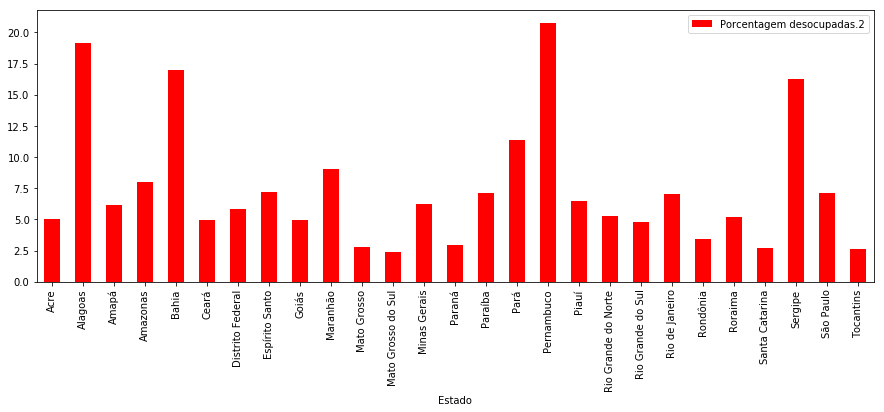

In [10]:
ocupacao["Porcentagem desocupadas.2"] = (ocupacao["Desocupadas.2"]*100)/(ocupacao["Economicamente ativas.2"])
ocupacao_agrupado = ocupacao.groupby("Estado").agg("var")
ocupacao_agrupado.plot(y="Porcentagem desocupadas.2", kind="bar", figsize=(15,5),color="red")
display(ocupacao_agrupado)

#### O estado com maior desigualdade do número de pessoas desempregadas acima de 14 anos, entre seus municípios, é o Pernambuco, o gráfico acima mostra que esse é o estado com maior variância desse parâmetro. 

# Questão 3

### Qual a cidade com maior número de residentes estrangeiros, quantos são, e em qual estado essa cidade está localizada?

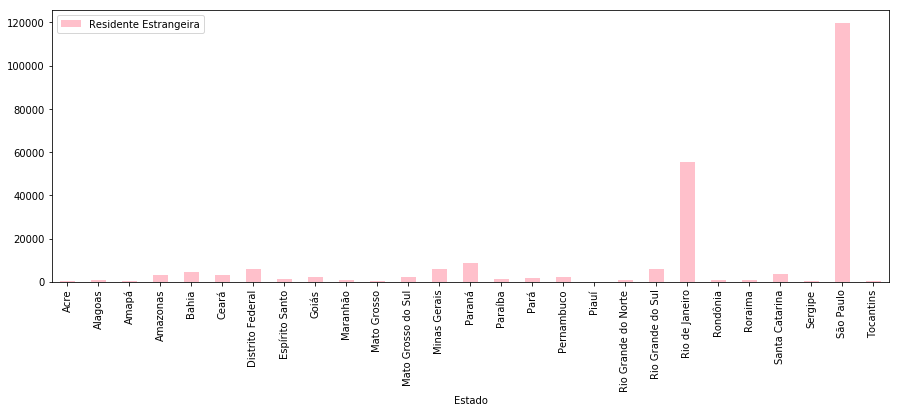

In [11]:
pop.groupby("Estado").agg("max").plot(y="Residente Estrangeira",kind="bar",color="pink",figsize=(15,5))

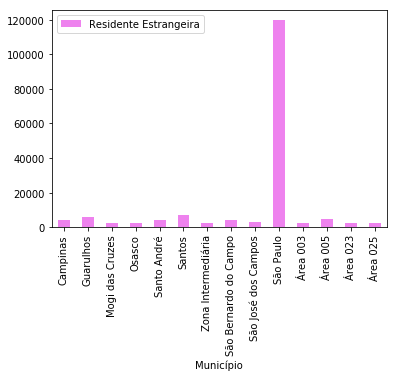

In [12]:
condicao = (pop["Estado"] == "São Paulo") & (pop["Residente Estrangeira"] > 2000)
pop[condicao].plot(x="Município",y="Residente Estrangeira",kind="bar",color="violet")

In [13]:
condicao = pop["Município"]=="São Paulo"
display(pop[condicao])

,Estado,Município,Total Residente,Residente Brasileira,Brasileira Nata,Brasileira por naturalização,Residente Estrangeira,Código da Unidade Geográfica
4626,São Paulo,São Paulo,11253503,11133776,11102432,31345,119727,3550308.0


#### A cidade de São Paulo, no estado de São Paulo, é onde habitam o maior número de residente estrangeiros, sendo um total de 119727 pessoas

# Questão 4

### É correto dizer que quanto maior a porcentagem de pessoas com ensino superior completo, maior a porcentagem de pessoas com salário acima de 20 SM, e menor a porcentagem de pessoas com até 1 SM?

,Total pessoas > 10 anos,Sem instrução e fundamental incompleto,Fundamental completo e médio incompleto,Médio completo e superior incompleto,Superior completo,Não determinado,Código da Unidade Geográfica,Porcentagem superior completo,Até 1 SM,De 1 a 2 SM,De 2 a 3 SM,De 3 a 5 SM,De 5 a 10 SM,De 10 a 20 SM,Mais de 20 SM,Sem rendimento,Porcentagem até 1 SM,Porcentagem mais de 20 SM
Total pessoas > 10 anos,1.000000,0.994525,0.998554,0.995681,0.975645,0.945001,-0.181548,0.025681,0.936096,0.993586,0.985552,0.984274,0.977281,0.957100,0.944109,0.996940,-0.033479,0.021797
Sem instrução e fundamental incompleto,0.994525,1.000000,0.994206,0.984701,0.952517,0.945469,-0.225672,-0.023286,0.948164,0.987695,0.973438,0.967436,0.954568,0.929039,0.917072,0.995704,0.012716,-0.014100
Fundamental completo e médio incompleto,0.998554,0.994206,1.000000,0.993391,0.969519,0.946674,-0.177856,0.010732,0.931162,0.995241,0.986862,0.983176,0.972367,0.948871,0.935275,0.996426,-0.039917,0.006131
Médio completo e superior incompleto,0.995681,0.984701,0.993391,1.000000,0.971146,0.923145,-0.164607,0.044312,0.942389,0.985062,0.977076,0.977759,0.973339,0.955188,0.937717,0.991780,-0.058472,0.029846
Superior completo,0.975645,0.952517,0.969519,0.971146,1.000000,0.930280,-0.106211,0.125988,0.861486,0.973254,0.980587,0.990321,0.998166,0.992671,0.985586,0.962698,-0.088760,0.110863
Não determinado,0.945001,0.945469,0.946674,0.923145,0.930280,1.000000,-0.113433,0.015289,0.823117,0.958823,0.954915,0.947833,0.931385,0.900994,0.905730,0.946946,-0.044277,0.014773
Código da Unidade Geográfica,-0.181548,-0.225672,-0.177856,-0.164607,-0.106211,-0.113433,1.000000,0.187699,-0.280734,-0.163900,-0.143166,-0.129991,-0.108529,-0.087467,-0.073645,-0.189233,-0.380938,0.123315
Porcentagem superior completo,0.025681,-0.023286,0.010732,0.044312,0.125988,0.015289,0.187699,1.000000,-0.041445,0.018094,0.045495,0.073574,0.108374,0.140651,0.153583,0.005976,-0.587189,0.853553
Até 1 SM,0.936096,0.948164,0.931162,0.942389,0.861486,0.823117,-0.280734,-0.041445,1.000000,0.900977,0.869434,0.865742,0.859026,0.838743,0.817589,0.941928,0.083891,-0.026525
De 1 a 2 SM,0.993586,0.987695,0.995241,0.985062,0.973254,0.958823,-0.163900,0.018094,0.900977,1.000000,0.995494,0.990546,0.977006,0.950903,0.939351,0.987487,-0.065600,0.008295


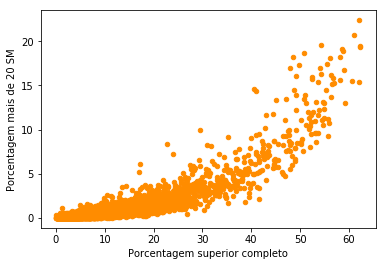

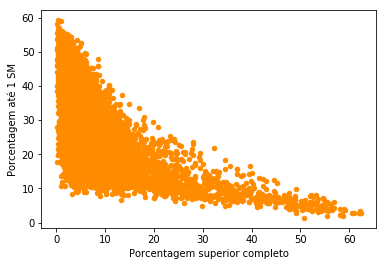

In [14]:
nivel["Porcentagem superior completo"] = (nivel["Superior completo"]*100)/nivel["Total pessoas > 10 anos"]
renda["Porcentagem até 1 SM"] = (renda["Até 1 SM"]*100)/renda["Total pessoas > 10 anos"]
renda["Porcentagem mais de 20 SM"] = (renda["Mais de 20 SM"]*100)/renda["Total pessoas > 10 anos"]
nivel_renda = pd.merge(nivel,renda)
nivel_renda.plot(x="Porcentagem superior completo",y="Porcentagem mais de 20 SM",kind="scatter",color="darkorange")
nivel_renda.plot(x="Porcentagem superior completo",y="Porcentagem até 1 SM", kind = "scatter",color="darkorange")
nivel_renda.corr()

#### A afirmação acima é verdadeira, como pode ser observado nos gráficos

# Questão 5

### Existe alguma relação entre a quantidade de pessoas residentes em determinado local e a porcentagem de pessoas ocupadas e desocupadas acima de 14 anos neste local?

,Total Residente,Residente Brasileira,Brasileira Nata,Brasileira por naturalização,Residente Estrangeira,Código da Unidade Geográfica,Total pessoas > 10 anos,Economicamente ativas,Ocupadas,Desocupadas,...,Ocupadas.1,Desocupadas.1,Não economicamente ativas.1,Total pessoas > 14 anos,Economicamente ativas.2,Ocupadas.2,Desocupadas.2,Não economicamente ativas.2,Porcentagem desocupadas.2,Porcentagem ocupadas.2
Total Residente,1.000000,0.999992,0.999988,0.913923,0.900730,-0.185643,0.999889,0.998854,0.998341,0.981351,...,0.928640,0.950309,0.997016,0.999757,0.998838,0.998321,0.981304,0.996434,0.020320,-0.020321
Residente Brasileira,0.999992,1.000000,1.000000,0.912428,0.899029,-0.186676,0.999858,0.998804,0.998262,0.981640,...,0.928888,0.950246,0.997153,0.999712,0.998787,0.998240,0.981599,0.996402,0.020659,-0.020661
Brasileira Nata,0.999988,1.000000,1.000000,0.912027,0.898625,-0.186923,0.999848,0.998784,0.998233,0.981720,...,0.928937,0.950237,0.997186,0.999699,0.998767,0.998212,0.981680,0.996402,0.020778,-0.020779
Brasileira por naturalização,0.913923,0.912428,0.912027,1.000000,0.988856,-0.067291,0.916162,0.919452,0.922526,0.862139,...,0.826963,0.870378,0.896035,0.917403,0.919543,0.922630,0.861557,0.908900,-0.030783,0.030783
Residente Estrangeira,0.900730,0.899029,0.898625,0.988856,1.000000,-0.051946,0.903288,0.904433,0.907215,0.850870,...,0.807997,0.862247,0.881923,0.904639,0.904535,0.907337,0.850246,0.900304,-0.019511,0.019512
Código da Unidade Geográfica,-0.185643,-0.186676,-0.186923,-0.067291,-0.051946,1.000000,-0.181630,-0.174137,-0.172804,-0.185537,...,-0.291633,-0.171943,-0.207134,-0.179375,-0.173659,-0.172288,-0.185646,-0.188930,-0.158824,0.158822
Total pessoas > 10 anos,0.999889,0.999858,0.999848,0.916162,0.903288,-0.181630,1.000000,0.998997,0.998592,0.980232,...,0.925240,0.948544,0.995842,0.999973,0.998996,0.998586,0.980196,0.996756,0.017541,-0.017542
Economicamente ativas,0.998854,0.998804,0.998784,0.919452,0.904433,-0.174137,0.998997,1.000000,0.999841,0.978352,...,0.926209,0.949474,0.994000,0.999027,0.999999,0.999836,0.978274,0.992251,0.008802,-0.008803
Ocupadas,0.998341,0.998262,0.998233,0.922526,0.907215,-0.172804,0.998592,0.999841,1.000000,0.974509,...,0.925351,0.946149,0.992834,0.998682,0.999846,0.999999,0.974425,0.991557,0.002242,-0.002244
Desocupadas,0.981351,0.981640,0.981720,0.862139,0.850870,-0.185537,0.980232,0.978352,0.974509,1.000000,...,0.914413,0.965788,0.984201,0.979560,0.978277,0.974458,0.999992,0.977005,0.084776,-0.084777


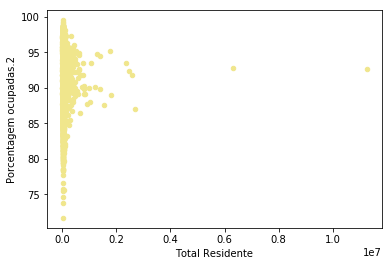

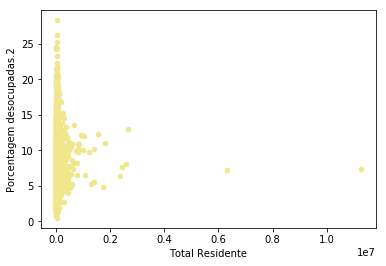

In [15]:
ocupacao["Porcentagem ocupadas.2"] = (ocupacao["Ocupadas.2"]*100)/(ocupacao["Economicamente ativas.2"]) 
pop_ocupacao = pd.merge(pop,ocupacao)
pop_ocupacao.plot(x="Total Residente",y="Porcentagem ocupadas.2",kind="scatter",color="khaki")
pop_ocupacao.plot(x="Total Residente",y="Porcentagem desocupadas.2",kind="scatter",color="khaki")
pop_ocupacao.corr()

#### Não existe relação alguma

# Questão 6

### De acordo as regiões geoeconômicas, qual é a mais rica se fosse levado em conta apenas o município com maior número de pessoas que possuem mais de 20 salários mínimos? E a mais pobre?

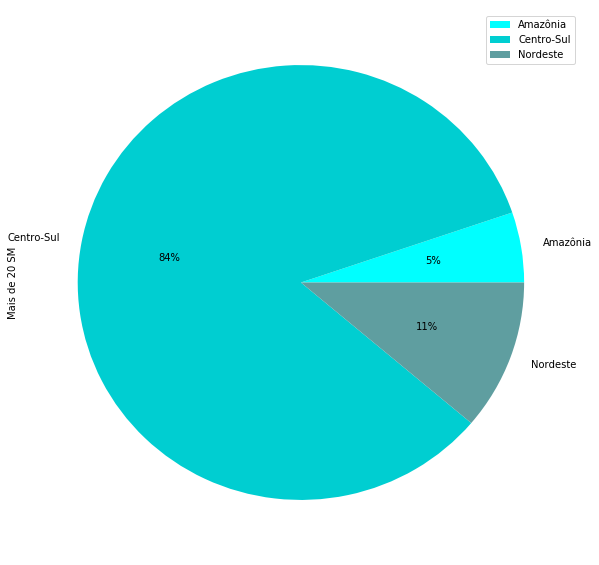

In [16]:
condicao = (renda["Estado"] == "Rio Grande do Sul") | (renda["Estado"] == "Santa Catarina") | (renda["Estado"] == "Paraná")|(renda["Estado"] == "São Paulo") | (renda["Estado"] == "Rio de Janeiro") | (renda["Estado"] == "Espirito Santo") | (renda["Estado"] == "Minas Gerais")|(renda["Estado"] == "Mato Grosso do Sul") | (renda["Estado"] == "Goiás")
#como a maior parte de MG está na região Centro-Sul, inserimos o estado neste grupo
condicao1 = (renda["Estado"] == "Ceará") | (renda["Estado"] == "Sergipe") | (renda["Estado"] == "Rio Grande do Norte") | (renda["Estado"] == "Paraíba") |(renda["Estado"] == "Pernambuco") | (renda["Estado"] == "Maranhão") | (renda["Estado"] == "Piaui") | (renda["Estado"] == "Bahia") | (renda["Estado"] == "Alagoas")
#como a maior parte do MA está na região Nordeste, inserimos o estado neste grupo
condicao2 = (renda["Estado"] == "Amazonas") | (renda["Estado"] == "Pará") | (renda["Estado"] == "Acre") | (renda["Estado"] == "Roraima")|(renda["Estado"] == "Rondônia") | (renda["Estado"] == "Amapá") | (renda["Estado"] == "Tocantins")
#como a maior parte do MT e do TO está na região da Amazônia, inserimos esses estados neste grupo
linhas = list(renda[condicao].index.values)
linhas1 = list(renda[condicao1].index.values)
linhas2 = list(renda[condicao2].index.values)
for i in linhas:
    renda.at[i, "Região Geoeconômica"] = "Centro-Sul"
for i in linhas1:
    renda.at[i, "Região Geoeconômica"] = "Nordeste"
for i in linhas2:
    renda.at[i, "Região Geoeconômica"] = "Amazônia"
renda.groupby("Região Geoeconômica").agg("max").plot(x="Região Geoeconômica",y="Mais de 20 SM",kind="pie",figsize =(10,10),autopct="%1.0f%%",colors=["cyan","darkturquoise","cadetblue"])

#### A partir da análise do gráfico, é possível concluir que a região geoeconômica mais rica, se for levada em conta apenas a renda dos indivíduos, é a Centro-Sul, pois essa abriga a maioria das pessoas que possuem renda mensal de mais de 20 salários mínimos,  enquanto a região mais pobre é a Amazônia, já que abriga menos indíviduos com tal renda. Essa diferença é bastante evidente, já que a região geoeconômica da Amazônia somada com a do Nordeste não chega a ocupar 20% do gráfico

# Questão 7

### Qual foi a taxa de desemprego em 2010 no Brasil?

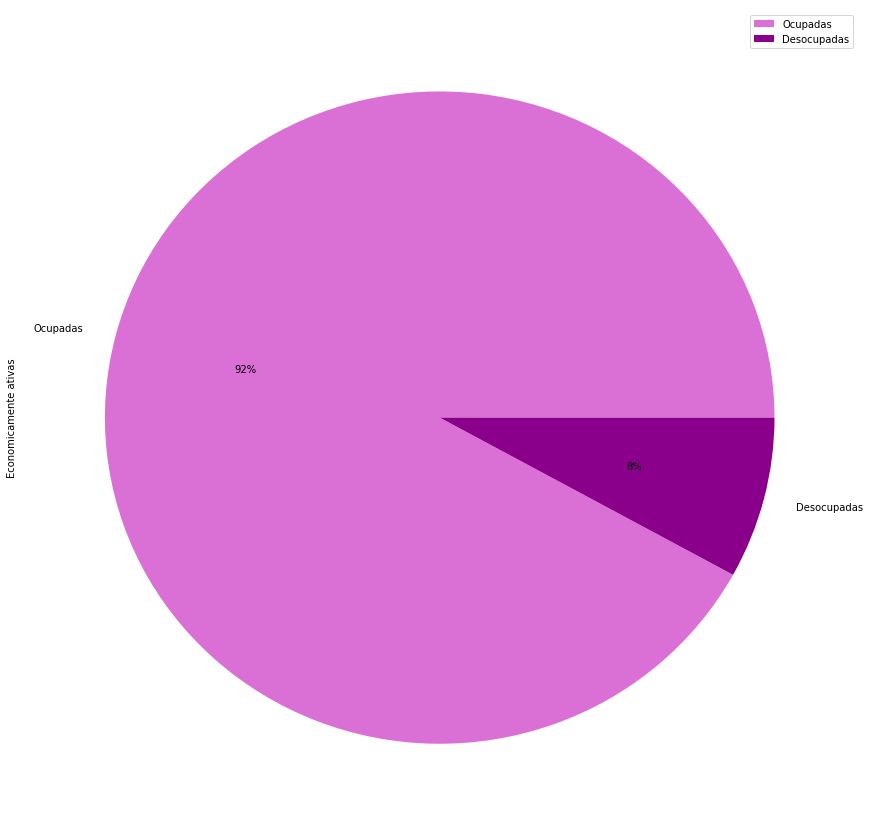

In [17]:
# ocupacao["Ocupadas"].sum() é igual a 132322792, por isso utilizamos este valor
ocupacao.loc[7000] = ["Ocupadas","Ocupadas",132322792,132322792,132322792,132322792,132322792,132322792,132322792,132322792,132322792,132322792,132322792,132322792,132322792,132322792,132322792,132322792,"Ocupadas",132322792,132322792]
# ocupacao["Desocupadas"].sum() é igual a 11513116, por isso utilizamos este valor
ocupacao.loc[7001] = ["Desocupadas","Desocupadas",11513116,11513116,11513116,11513116,11513116,11513116,11513116,11513116,11513116,11513116,11513116,11513116,11513116,11513116,11513116,11513116,"Desocupadas",11513116,11513116]
linhas = [7000, 7001]
ocupacao2 = ocupacao.loc[linhas]
ocupacao2.set_index("Município", inplace=True)
ocupacao2.plot(y="Economicamente ativas",kind="pie",figsize=(15,15),autopct="%1.0f%%",colors=["orchid","darkmagenta"])
ocupacao.drop(linhas, axis=0, inplace=True)
# Demos drop nas linhas para não interferir em usos futuros do mesmo arquivo

#### A taxa de desemprego no Brasil em 2010 foi de 8%, como pode ser observado no gráfico

# Questão 8

### Como se caracteriza o fornecimento de água por estado na região Centro-Oeste?

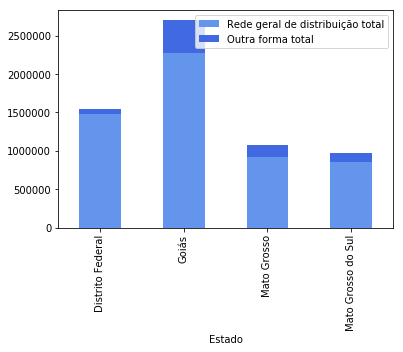

In [18]:
condicao = (agua["Estado"] == "Rio Grande do Sul") | (agua["Estado"] == "Santa Catarina") | (agua["Estado"] == "Paraná")
condicao1 = (agua["Estado"] == "São Paulo") | (agua["Estado"] == "Rio de Janeiro") | (agua["Estado"] == "Espirito Santo") | (agua["Estado"] == "Minas Gerais")
condicao2 = (agua["Estado"] == "Mato Grosso") | (agua["Estado"] == "Mato Grosso do Sul") | (agua["Estado"] == "Goiás") | (agua["Estado"] == "Distrito Federal")
condicao3 = (agua["Estado"] == "Ceará") | (agua["Estado"] == "Sergipe") | (agua["Estado"] == "Rio Grande do Norte") | (agua["Estado"] == "Paraíba") |(agua["Estado"] == "Pernambuco") | (agua["Estado"] == "Maranhão") | (agua["Estado"] == "Piaui") | (agua["Estado"] == "Bahia") | (agua["Estado"] == "Alagoas")
condicao4 = (agua["Estado"] == "Amazonas") | (agua["Estado"] == "Pará") | (agua["Estado"] == "Acre") | (agua["Estado"] == "Roraima")|(agua["Estado"] == "Rondônia") | (agua["Estado"] == "Amapá") | (agua["Estado"] == "Tocantins")
linhas = list(agua[condicao].index.values)
linhas1 = list(agua[condicao1].index.values)
linhas2 = list(agua[condicao2].index.values)
linhas3 = list(agua[condicao3].index.values)
linhas4 = list(agua[condicao4].index.values)
for i in linhas:
    agua.at[i, "Região"] = "Sul"
for i in linhas1:
    agua.at[i, "Região"] = "Sudeste"
for i in linhas2:
    agua.at[i, "Região"] = "Centro-Oeste"
for i in linhas3:
    agua.at[i, "Região"] = "Nordeste"
for i in linhas4:
    agua.at[i, "Região"] = "Norte"
agua["Rede geral de distribuição total"] = agua["Rede geral de distribuição"]+agua["Rede geral de distribuição.1"]
agua["Outra forma total"] = agua["Outra forma"]+agua["Outra forma.1"]
condicao = agua["Região"] == "Centro-Oeste"
agua[condicao].groupby("Estado").agg("sum").plot(y=["Rede geral de distribuição total","Outra forma total"],kind="bar",stacked=True,color=["cornflowerblue","royalblue"])

#### Grande parte da população da região Centro-Oeste utiliza água da rede geral de distribuição, porém o uso de outra forma de abastecimento em Goiás é bem expressivo

# Questão 9

### Qual a proporção entre domicílios com e sem água canalizada, em relação ao total de domicílios, por região geoeconômica no Brasil?

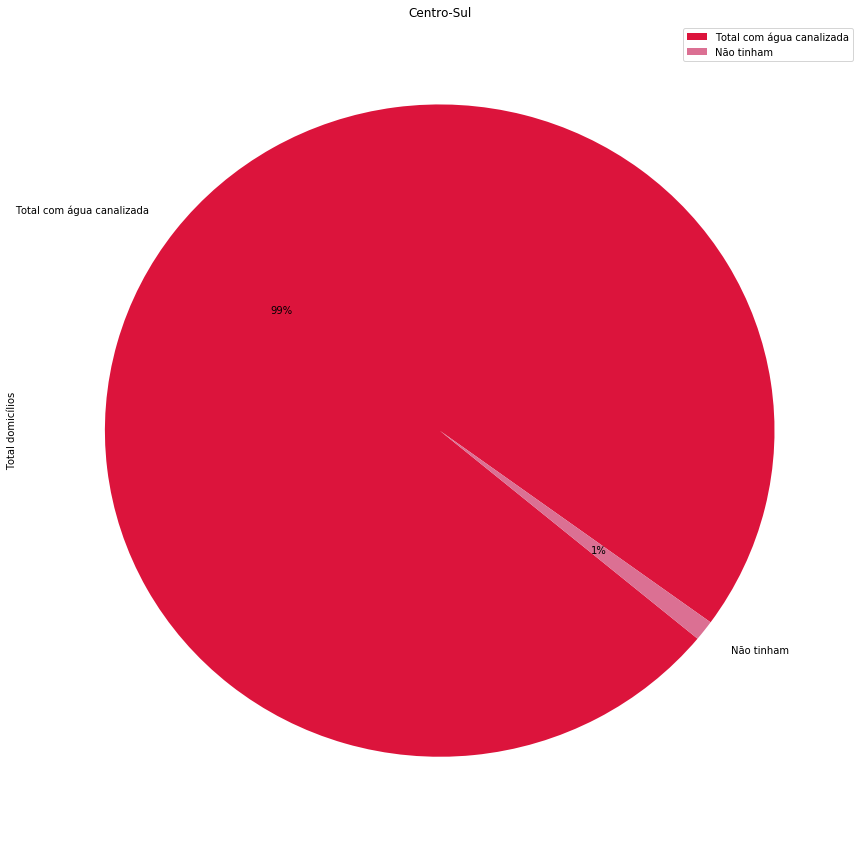

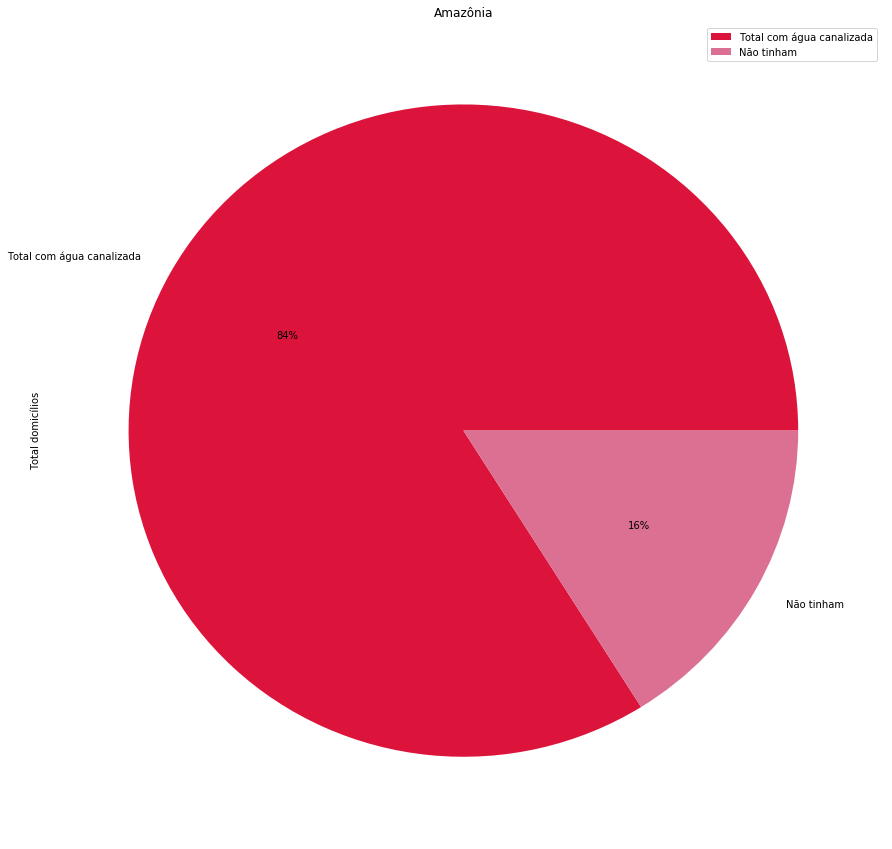

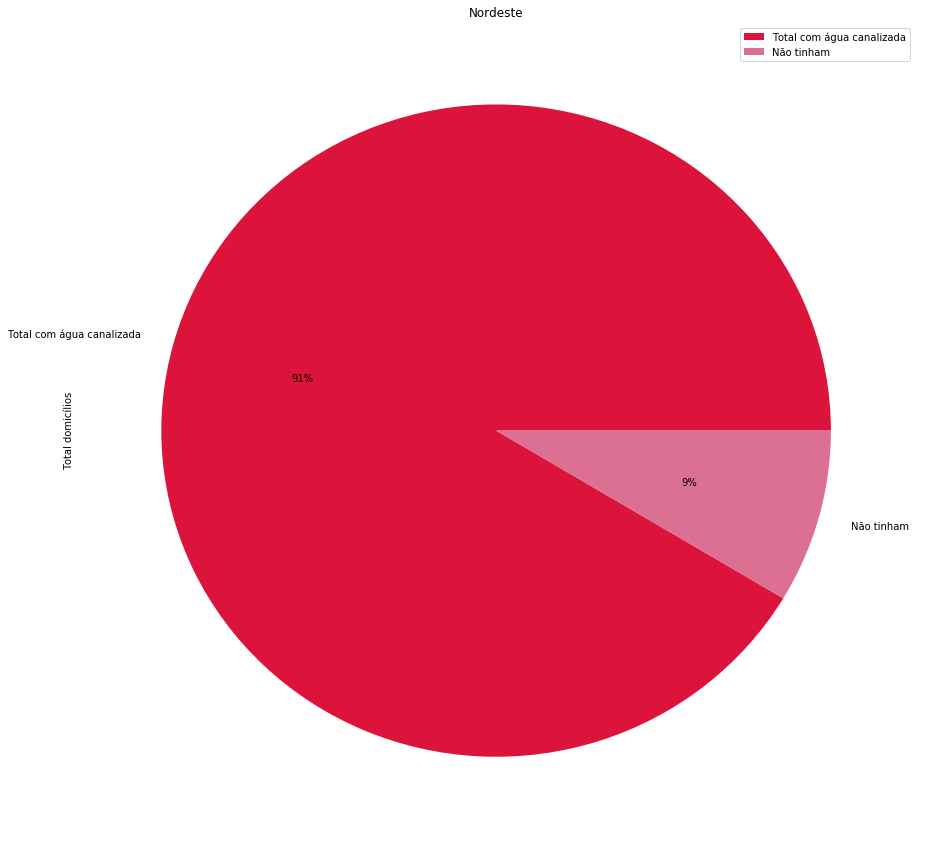

In [19]:
condicao = (agua["Estado"] == "Rio Grande do Sul") | (agua["Estado"] == "Santa Catarina") | (agua["Estado"] == "Paraná")|(agua["Estado"] == "São Paulo") | (agua["Estado"] == "Rio de Janeiro") | (agua["Estado"] == "Espirito Santo") | (agua["Estado"] == "Minas Gerais")|(agua["Estado"] == "Mato Grosso do Sul") | (agua["Estado"] == "Goiás")
#como a maior parte de MG está na região Centro-Sul, inserimos o estado neste grupo
condicao1 = (agua["Estado"] == "Ceará") | (agua["Estado"] == "Sergipe") | (agua["Estado"] == "Rio Grande do Norte") | (agua["Estado"] == "Paraíba") |(agua["Estado"] == "Pernambuco") | (agua["Estado"] == "Maranhão") | (agua["Estado"] == "Piaui") | (agua["Estado"] == "Bahia") | (agua["Estado"] == "Alagoas")
#como a maior parte do MA está na região Nordeste, inserimos o estado neste grupo
condicao2 = (agua["Estado"] == "Amazonas") | (agua["Estado"] == "Pará") | (agua["Estado"] == "Acre") | (agua["Estado"] == "Roraima")|(agua["Estado"] == "Rondônia") | (agua["Estado"] == "Amapá") | (agua["Estado"] == "Tocantins")
#como a maior parte do MT e do TO está na região da Amazônia, inserimos esses estados neste grupo
linhas = list(agua[condicao].index.values)
linhas1 = list(agua[condicao1].index.values)
linhas2 = list(agua[condicao2].index.values)
for i in linhas:
    agua.at[i, "Região Geoeconômica"] = "Centro-Sul"
for i in linhas1:
    agua.at[i, "Região Geoeconômica"] = "Nordeste"
for i in linhas2:
    agua.at[i, "Região Geoeconômica"] = "Amazônia"
#agua["Total com água canalizada"].sum() para agua["Região Geoeconômica"] == "Centro-Sul" é igual a 56816224, por isso utilizamos este valor
agua.loc[7000] = ["Total com água canalizada","Total com água canalizada",56816224,56816224,56816224,56816224,56816224,56816224,56816224,56816224,56816224,56816224,56816224,"Centro-Sul","Centro-Sul",56816224,56816224]
#agua["Não tinham"].sum() para agua["Região Geoeconômica"] == "Centro-Sul" é igual a 579929, por isso utilizamos este valor
agua.loc[7001] = ["Não tinham","Não tinham",579929,579929,579929,579929,579929,579929,579929,579929,579929,579929,579929,"Centro-Sul","Centro-Sul",579929,579929]
#agua["Total com água canalizada"].sum() para agua["Região Geoeconômica"] == "Amazônia" é igual a 4683855, por isso utilizamos este valor
agua.loc[7002] = ["Total com água canalizada","Total com água canalizada",4683855,4683855,4683855,4683855,4683855,4683855,4683855,4683855,4683855,4683855,4683855,"Amazônia","Amazonia",4683855,4683855]
#agua["Não tinham"].sum() para agua["Região Geoeconômica"] == "Amazônia" é igual a 898414, por isso utilizamos este valor
agua.loc[7003] = ["Não tinham","Não tinham",898414,898414,898414,898414,898414,898414,898414,898414,898414,898414,898414,"Amazônia","Amazonia",898414,898414]
#agua["Total com água canalizada"].sum() para agua["Região Geoeconômica"] == "Nordeste" é igual a 17129818, por isso utilizamos este valor
agua.loc[7004] = ["Total com água canalizada","Total com água canalizada",17129818,17129818,17129818,17129818,17129818,17129818,17129818,17129818,17129818,17129818,17129818,"Nordeste","Nordeste",17129818,17129818]
#agua["Não tinham"].sum() para agua["Região Geoeconômica"] == "Nordeste" é igual a 1610992, por isso utilizamos este valor
agua.loc[7005] = ["Não tinham","Não tinham",1610992,1610992,1610992,1610992,1610992,1610992,1610992,1610992,1610992,1610992,1610992,"Nordeste","Nordeste",1610992,1610992]   
linhas1 = [7000,7001]
linhas2 = [7002,7003]
linhas3 = [7004,7005]
linhas = linhas1+linhas2+linhas3
agua1 = agua.loc[linhas1]
agua1.set_index("Município",inplace=True)
agua1.plot(y="Total domicílios",kind="pie",autopct="%1.0f%%",title = "Centro-Sul",figsize=(15,15),startangle=(-36),colors=["crimson","palevioletred"])
agua2 = agua.loc[linhas2]
agua2.set_index("Município",inplace=True)
agua2.plot(y="Total domicílios",kind="pie",autopct="%1.0f%%",title = "Amazônia",figsize=(15,15),colors=["crimson","palevioletred"])
agua3 = agua.loc[linhas3]
agua3.set_index("Município",inplace=True)
agua3.plot(y="Total domicílios",kind="pie",autopct="%1.0f%%",title = "Nordeste",figsize=(15,15),colors=["crimson","palevioletred"])
agua.drop(linhas, axis=0,inplace=True)
# Demos drop nas linhas para não interferir em usos futuros do mesmo arquivo

#### Centro-Sul: Total com água canalizada = 99% ; Total sem água canalizada = 1%
#### Amazônia: Total com água canalizada = 84% ; Total sem água canalizada = 16%
#### Nordeste: Total com água canalizada = 91% ; Total sem água canalizada = 9%

# Questão 10

### A média e a mediana da quantidade total de residentes no estado de São Paulo são proximas? Por que isso acontece?

Total Residente               Residente Brasileira                \
                   median          mean               median          mean   
Estado                                                                       
São Paulo           25671  45565.772277              25522.5  45320.108292   

          Brasileira Nata               Brasileira por naturalização  \
                   median          mean                       median   
Estado                                                                 
São Paulo           25501  45247.761139                           18   

                     Residente Estrangeira              \
                mean                median        mean   
Estado                                                   
São Paulo  72.340347                    47  245.663985   

          Código da Unidade Geográfica                
                                median          mean  
Estado                                                
São Paulo                 3.530300e+12  3.115772e+12

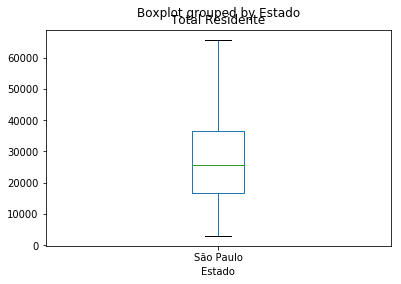

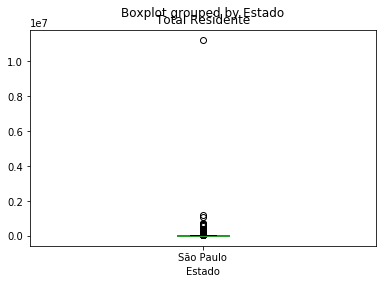

In [20]:
condicao = pop["Estado"] == "São Paulo"
pop[condicao].boxplot("Total Residente", by="Estado", showfliers=False,grid=False)
pop[condicao].boxplot("Total Residente", by="Estado", showfliers=True,grid=False)
pop[condicao].describe()
display(pop[condicao].groupby("Estado").agg(["median","mean"]))

#### Não. Isso acontece porque o estado de São Paulo possuí municípios com uma quantidade exorbitante de habitantes, como é possível observar no gráfico acima, dessa forma, o valor da media também sobe, para que a media fosse parecida com a mediana, não poderiam haver valores tão discrepantes no boxplot

# Questão 11

### Pelo gráfico 4 é possível observar que a grande maioria dos valores estão entre 0 e 10 residentes estrangeiros, como se dá a distribuição de residentes estrangeiros entre esses valores? O que é possível inferir sobre os dados observados?

0    0
dtype: int64

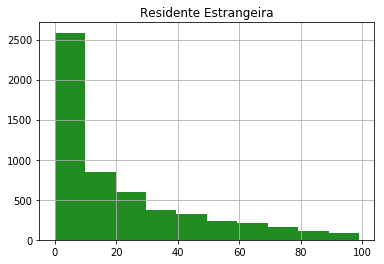

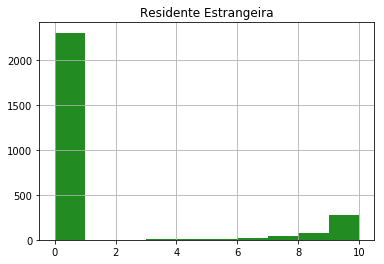

In [21]:
condicao = (pop["Residente Estrangeira"]) < 100
condicao1 = (pop["Residente Estrangeira"]) <= 10
pop[condicao].hist("Residente Estrangeira",color="forestgreen")
pop[condicao1].hist("Residente Estrangeira",color="forestgreen")
display(pop["Residente Estrangeira"].agg("mode"))

#### Como é possível observar no gráfico acima, praticamente todos os municípios analisados possuem 0 residentes estrangeiros, dessa forma, 0 também é a moda